# Veri setimizi ve gerekli kütüphaneleri yükliyelim

In [4]:
import pandas as pd
import numpy as np
#confusion matrixe bir daha bakalım
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
pd.set_option('max_columns', None)
df = pd.read_excel("Telco_customer_churn.xlsx")
df.head()

'Churn Value' sütunu müşterinin son çeyrekte şirketten ayrılıp ayrılmadığının değeridir. 0 için ayrılmamış, 1 için ayrılmış. Bizim amacamız da bu değeri tahmin etmek olucak

Veri setimizi gözden geçirirsek çok fazla yes ve no cevaplarından oluşan satırlar göreceğiz.

# Veri temizliği

İçinde tek bir değer olan sütunlar işimize yaramıyacağı için sütunu dropluyoruz

In [8]:
for col in df:    
    if len(df[col].unique()) == 1:
        print('Column: {} \n Is uniqe: {}'.format(col, df[col].unique()))
        df.drop([col], inplace=True, axis=1)

Column: Count 
 Is uniqe: [1]
Column: Country 
 Is uniqe: ['United States']
Column: State 
 Is uniqe: ['California']


In [9]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,CustomerID,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [10]:
df.head()

,CustomerID,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


Önemsiz sütunların droplanması

In [11]:
df.drop(['CustomerID', 'Lat_Long', 'Churn_Label', 'CLTV', 'Churn_Reason', 'Churn_Score'], inplace=True, axis=1)

In [12]:
df.drop('Latitude', inplace=True, axis = 1)

In [13]:
df.head()

,City,Zip_Code,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los Angeles,90003,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [14]:
df.dtypes

City                  object
Zip_Code               int64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

Datamızın sütun typelarına baktığımızda total_charges sütunun float olması gerektiğini görüyoruz ancak yukarıda bastırdığımız da object tipi bastırıyor.

In [15]:
for col in df:    
    if len(df[col].unique()) > 5 and df[col].dtype == object:
        print('Column: {} \n Is uniqe: {}'.format(col, df[col].unique()))

Column: City 
 Is uniqe: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Column: Total_Charges 
 Is uniqe: [108.15 151.65 820.5 ... 7362.9 346.45 6844.5]


In [16]:
df.Total_Charges = pd.to_numeric(df.Total_Charges)

ValueError: Unable to parse string " " at position 2234

Nümeriğe cevirmeye çalışırken 2234. satırda değer yerine " " olduğunuz görüyoruz.

In [17]:
df.loc[(df.Total_Charges == ' '), 'Total_Charges'] = 0

Ve boş olan değerleri 0 ile değiştiriyoruz. Bu satırları droplayada bilirdik ben bu yolu tercih ettim

In [18]:
df.Total_Charges = pd.to_numeric(df.Total_Charges)

In [19]:
df.Total_Charges.dtype

dtype('float64')

In [20]:
X = df.drop('Churn_Value', axis=1).copy()
X.head()

,City,Zip_Code,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los Angeles,90003,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,Los Angeles,90005,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,Los Angeles,90006,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,Los Angeles,90010,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,Los Angeles,90015,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [21]:
y = df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

Kategorik veri tipleri one-hot encoding yaparak ayırıyoruz.

In [ ]:
X_encoded = pd.get_dummies(X, columns=['City',
                                       'Gender',
                                       'Senior_Citizen',
                                       'Partner',
                                      'Dependents',
                                       'Phone_Service',
                                      'Multiple_Lines',
                                      'Internet_Service',
                                      'Online_Security',
                                      'Online_Backup',
                                      'Device_Protection',
                                      'Tech_Support',
                                      'Streaming_TV',
                                      'Streaming_Movies',
                                      'Contract',
                                      'Paperless_Billing',
                                      'Payment_Method'])

In [23]:
X_encoded.head()

,Zip_Code,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso Viejo,City_Alleghany,City_Alpaugh,City_Alpine,City_Alta,City_Altadena,City_Alturas,City_Alviso,City_Amador City,City_Amboy,City_Anaheim,City_Anderson,City_Angels Camp,City_Angelus Oaks,City_Angwin,City_Annapolis,City_Antelope,City_Antioch,City_Anza,City_Apple Valley,City_Applegate,City_Aptos,City_Arbuckle,City_Arcadia,City_Arcata,City_Armona,City_Arnold,City_Aromas,City_Arroyo Grande,City_Artesia,City_Arvin,City_Atascadero,City_Atherton,City_Atwater,City_Auberry,City_Auburn,City_Avalon,City_Avenal,City_Avery,City_Avila Beach,City_Azusa,City_Badger,City_Baker,City_Bakersfield,City_Baldwin Park,City_Ballico,City_Bangor,City_Banning,City_Barstow,City_Bass Lake,City_Bayside,City_Beale Afb,City_Beaumont,City_Bell,City_Bella Vista,City_Bellflower,City_Belmont,City_Belvedere Tiburon,City_Ben Lomond,City_Benicia,City_Benton,City_Berkeley,City_Berry Creek,City_Bethel Island,City_Beverly Hills,City_Bieber,City_Big Bar,City_Big Bear City,City_Big Bear Lake,City_Big Bend,City_Big Creek,City_Big Oak Flat,City_Big Pine,City_Big Sur,City_Biggs,City_Biola,City_Birds Landing,City_Bishop,City_Blairsden Graeagle,City_Blocksburg,City_Bloomington,City_Blue Lake,City_Blythe,City_Bodega,City_Bodega Bay,City_Bodfish,City_Bolinas,City_Bonita,City_Bonsall,City_Boonville,City_Boron,City_Borrego Springs,City_Boulder Creek,City_Boulevard,City_Bradley,City_Branscomb,City_Brawley,City_Brea,City_Brentwood,City_Bridgeport,City_Bridgeville,City_Brisbane,City_Brookdale,City_Brooks,City_Browns Valley,City_Brownsville,City_Buellton,City_Buena Park,City_Burbank,City_Burlingame,City_Burney,City_Burnt Ranch,City_Burson,City_Butte City,City_Buttonwillow,City_Byron,City_Cabazon,City_Calabasas,City_Calexico,City_Caliente,City_California City,City_California Hot Springs,City_Calimesa,City_Calipatria,City_Calistoga,City_Callahan,City_Calpine,City_Camarillo,City_Cambria,City_Camino,City_Camp Nelson,City_Campbell,City_Campo,City_Campo Seco,City_Camptonville,City_Canby,City_Canoga Park,City_Cantua Creek,City_Canyon Country,City_Canyon Dam,City_Capay,City_Capistrano Beach,City_Capitola,City_Cardiff By The Sea,City_Carlotta,City_Carlsbad,City_Carmel,City_Carmel By The Sea,City_Carmel Valley,City_Carmichael,City_Carnelian Bay,City_Carpinteria,City_Carson,City_Caruthers,City_Casmalia,City_Caspar,City_Cassel,City_Castaic,City_Castella,City_Castro Valley,City_Castroville,City_Cathedral City,City_Catheys Valley,City_Cayucos,City_Cazadero,City_Cedar Glen,City_Cedarville,City_Ceres,City_Cerritos,City_Challenge,City_Chatsworth,City_Chester,City_Chico,City_Chilcoot,City_Chino,City_Chino Hills,City_Chowchilla,City_Chualar,City_Chula Vista,City_Citrus Heights,City_Claremont,City_Clarksburg,City_Clayton,City_Clearlake,City_Clearlake Oaks,City_Clements,City_Clio,City_Clipper Mills,City_Cloverdale,City_Clovis,City_Coachella,City_Coalinga,City_Coarsegold,City_Cobb,City_Coleville,City_Colfax,City_Colton,City_Columbia,City_Colusa,City_Comptche,City_Compton,City_Concord,City_Cool,City_Copperopolis,City_Corcoran,City_Corning,City_Corona,City_Corona Del Mar,City_Coronado,City_Corte Madera,City_Costa Mesa,City_Cotati,City_Cottonwood,City_Coulterville,City_Courtland,City_Covelo,City_Covina,City_Crescent City,City_Crescent Mills,City_Cressey,City_Crestline,City_Creston,City_Crockett,City_Crows Landing,City_Culver City,City_Cupertino,City_Cutler,City_Cypress,City_Daggett,City_Daly City,City_Dana Point,City_Danville,City_Darwin,City_Davenport,City_Davis,City_Davis Creek,City_Death Valley,City_Deer Park,City_Del Mar,City_Del Rey,City_Delano,City_Delhi,City_Denair,City_Descanso,City_Desert Center,City_Desert Hot Springs,City_Diamond Bar,City_Diamond Springs,City_Dillon Beach,City_Dinuba,City_Dixon,City_Dobbins,City_Dorris,City_Dos Palos,City_Dos Rios,City_Dougla

In [24]:
sum(y)/len(y)

0.2653698707936959

In [25]:
X_encoded = np.array(X_encoded)
y = np.array(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

In [27]:
print(X_test)

[[ 9.45180000e+04 -1.22022455e+02  5.20000000e+01 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 9.21170000e+04 -1.17199424e+02  3.30000000e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.54410000e+04 -1.23064272e+02  1.00000000e+01 ...  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 9.13260000e+04 -1.18556218e+02  3.90000000e+01 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 9.55260000e+04 -1.23525626e+02  3.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 9.32210000e+04 -1.19018233e+02  2.90000000e+01 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]]


In [28]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

77.91


In [30]:
y_pred = logreg.predict(X_test)

In [31]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[1173  121]
 [ 268  199]]


              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1294
           1       0.62      0.43      0.51       467

    accuracy                           0.78      1761
   macro avg       0.72      0.67      0.68      1761
weighted avg       0.76      0.78      0.76      1761



<AxesSubplot:>

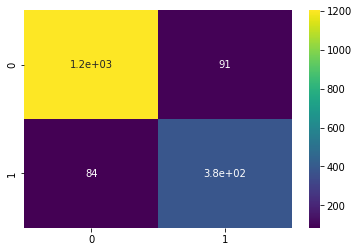

In [181]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'viridis', annot = True)

In [60]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)


73.48


In [173]:
y_pred = svc.predict(X_test)

In [177]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))


[[1294    0]
 [ 467    0]]


              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1294
           1       0.00      0.00      0.00       467

    accuracy                           0.73      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.73      0.62      1761



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

<AxesSubplot:>

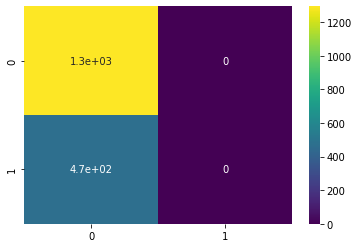

In [178]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'viridis', annot = True)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

72.74


In [51]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_sgd)

73.48


In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

81.15


In [53]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_decisiontree)

74.73


In [58]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

79.73


In [61]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','Logistic Regression', 'Gradient Boosting Classifier',
             'Stochastic Gradient Descent', 'KNN','Random Forest','Decision Tree'],
    'Score': [acc_svc,acc_logreg, acc_gbk, acc_sgd,acc_knn, acc_randomforest, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Gradient Boosting Classifier,81.15
5,Random Forest,79.73
1,Logistic Regression,77.91
6,Decision Tree,74.73
0,Support Vector Machines,73.48
3,Stochastic Gradient Descent,73.48
4,KNN,72.74


# Grid Search

In [5]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

In [34]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt", "None"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10, 50, 100, 150, 300]
    }

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)

clf.fit(X_train, y_train)
result_df=pd.DataFrame.from_dict(clf.cv_results_)
result_df[['split0_test_accuracy','split1_test_accuracy','split0_test_precision','split1_test_precision','split0_test_recall','split1_test_recall']]

,split0_test_accuracy,split1_test_accuracy,split0_test_precision,split1_test_precision,split0_test_recall,split1_test_recall
0,0.73457,0.73457,0.0,0.0,0.0,0.0
1,0.73457,0.73457,0.0,0.0,0.0,0.0
2,0.73457,0.73457,0.0,0.0,0.0,0.0
3,0.73457,0.73457,0.0,0.0,0.0,0.0
4,0.73457,0.73457,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
84667,0.73457,0.73457,0.0,0.0,0.0,0.0
84668,0.73457,0.73457,0.0,0.0,0.0,0.0
84669,0.73457,0.73457,0.0,0.0,0.0,0.0
84670,0.73457,0.73457,0.0,0.0,0.0,0.0


In [64]:
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_learning_rate,param_loss,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_subsample,params,split0_test_accuracy,split1_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.069711,0.004686,0.014356,0.001406,friedman_mse,0.01,deviance,3,log2,0.1,0.1,10,0.5,"{'criterion': 'friedman_mse', 'learning_rate':...",0.73457,0.73457,0.73457,0.0,357,0.0,0.0,0.0,0.0,360,0.0,0.0,0.0,0.0,360
1,0.069263,0.003587,0.014648,0.002319,friedman_mse,0.01,deviance,3,log2,0.1,0.1,10,0.618,"{'criterion': 'friedman_mse', 'learning_rate':...",0.73457,0.73457,0.73457,0.0,357,0.0,0.0,0.0,0.0,360,0.0,0.0,0.0,0.0,360
2,0.074022,0.005556,0.018412,0.003662,friedman_mse,0.01,deviance,3,log2,0.1,0.1,10,0.8,"{'criterion': 'friedman_mse', 'learning_rate':...",0.73457,0.73457,0.73457,0.0,357,0.0,0.0,0.0,0.0,360,0.0,0.0,0.0,0.0,360
3,0.068931,0.013654,0.022098,0.000115,friedman_mse,0.01,deviance,3,log2,0.1,0.1,10,0.85,"{'criterion': 'friedman_mse', 'learning_rate':...",0.73457,0.73457,0.73457,0.0,357,0.0,0.0,0.0,0.0,360,0.0,0.0,0.0,0.0,360
4,0.046970,0.005411,0.009984,0.002789,friedman_mse,0.01,deviance,3,log2,0.1,0.1,10,0.9,"{'criterion': 'friedman_mse', 'learning_rate':...",0.73457,0.73457,0.73457,0.0,357,0.0,0.0,0.0,0.0,360,0.0,0.0,0.0,0.0,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84667,0.073666,0.006812,0.010978,0.002451,mae,0.2,deviance,8,sqrt,0.5,0.5,10,0.8,"{'criterion': 'mae', 'learning_rate': 0.2, 'lo...",0.73457,0.73457,0.73457,0.0,357,0.0,0.0,0.0,0.0,360,0.0,0.0,0.0,0.0,360
84668,0.087442,0.001885,0.010172,0.003162,mae,0.2,deviance,8,sqrt,0.5,0.5,10,0.85,"{'criterion': 'mae', 'learning_rate': 0.2, 'lo...",0.73457,0.73457,0.73457,0.0,357,0.0,0.0,0.0,0.0,360,0.0,0.0,0.0,0.0,360
84669,0.075303,0.021373,0.009232,0.002584,mae,0.2,deviance,8,sqrt,0.5,0.5,10,0.9,"{'criterion': 'mae', 'learning_rate': 0.2, 'lo...",0.73457,0.73457,0.73457,0.0,357,0.0,0.0,0.0,0.0,360,0.0,0.0,0.0,0.0,360
84670,0.060163,0.018978,0.006579,0.000029,mae,0.2,deviance,8,sqrt,0.5,0.5,10,0.95,"{'criterion': 'mae', 'learning_rate': 0.2, 'lo...",0.73457,0.73457,0.73457,0.0,357,0.0,0.0,0.0,0.0,360,0.0,0.0,0.0,0.0,360


In [65]:
result_df['accuracy_score']=(result_df['split0_test_accuracy']+result_df['split1_test_accuracy'])/2

In [66]:
result_df.loc[result_df['accuracy_score'].idxmax()]['params']


{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.13636363636363638,
 'min_samples_split': 0.390909090909091,
 'n_estimators': 10,
 'subsample': 1.0}